In [1]:
%matplotlib inline
import matplotlib, qiskit, pprint
from matplotlib import pyplot as plt
import numpy as np
from numpy import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, IBMQ, transpile, schedule, assemble
from qiskit.providers.aer import QasmSimulator
from qiskit.test.mock import FakeAlmaden, FakeMelbourne
from qiskit.visualization import *


# load account
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
# simulators:
f_alma = FakeAlmaden() # simulator f_alma for pulse schedules
f_mel = FakeMelbourne() # simulator f_mel for simulator backend mel
qasm_simulator = Aer.get_backend('qasm_simulator') 

In [2]:
from qiskit.algorithms import Grover

In [3]:
# import custom modules:

from circ_utils import *

from operator_3q_lib import *

# Deterministic Scrambling Circuit

Reference: Verified Quantum Information Scrambling https://arxiv.org/abs/1806.02807

![Determ1](.\\pics\\Determ1_Scrambling_Circ.jpg)


Matrix:
![Determ4](.\\pics\\Determ4_Scrambling_Circ.jpg)


Unitary:
![Determ2](.\\pics\\Determ2_Scrambling_Circ.jpg)


In [4]:
from qiskit.circuit.library import GroverOperator

# Test 1: U and U* 
## 1.1 Alice Qubit in state |1>

In [63]:
# set number of qubits
n = 7
# circ 
circ = QuantumCircuit(n,n)
# pairs for mesurements
basemeas = bell_pairs[0]
bob_pair = bell_pairs[-1]
# inums for results
meas_a_i, meas_b_i = -1 * (basemeas[0]+1), -1 * (basemeas[1]+1)
bob_imeas, bob_pmeas = 0,1
bell_pairs = get_bell_pairs(circ)

######### protocol

circ.x(0)
entangle_bell_pairs(circ, bell_pairs)

circ.cz(0,2)
circ.cz(1,2)
circ.cz(0,1)
circ.barrier(0,1,2)
for i in [0,1,2]:
    circ.h(i)
circ.cz(0,2)
circ.cz(0,1)
circ.cz(1,2)

circ.cz(3,5)
circ.cz(4,5)
circ.cz(3,4)
circ.barrier(3,4,5)
for i in [3,4,5]:
    circ.h(i)
circ.cz(3,5)
circ.cz(3,4)
circ.cz(4,5)

circ.barrier()

for pair in bell_pairs:
    insert_bell_measurement(circ,pair)

circ.measure(0,0)

########################### run on f_alma ################################

# run on simulator
be = f_alma

pct = 5000
shots = 100*pct
qobj = assemble(circ, shots=shots)
result = be.run(qobj).result()
counts = result.get_counts()

exi_counts_1state = get_exited_state_dist(result, num_qubits=7)

############################ see results ##################################

bob_meas_1  = sum([v for (k,v) in counts.items() if k[bob_imeas]=="1"])
bob_p_meas_1 = sum([v for (k,v) in counts.items() if k[bob_pmeas]=="1"])
meas1_1 = sum([v for (k,v) in counts.items() if k[meas_a_i]=="1"])
meas2_1 =  sum([v for (k,v) in counts.items() if k[meas_b_i]=="1"])

print("\n Fidelity Bob Qubit: \t{}%".format(bob_meas_1/pct)) 
print("\n Fidelity Bob Partner: \t{}%".format(bob_p_meas_1/pct)) 
print("\n Fidelity Base Meas A: \t{}%".format(meas1_1/pct)) 
print("\n Fidelity Base Meas B: \t{}%".format(meas2_1/pct)) 


 Fidelity Bob Qubit: 	49.375%

 Fidelity Bob Partner: 	46.6908%

 Fidelity Base Meas A: 	44.7328%

 Fidelity Base Meas B: 	53.6742%


## 1.2 Alice Qubit in state |0>

In [64]:
############################################## f_mel

# set number of qubits
n = 7
# circ 
circ = QuantumCircuit(n,n)
# pairs for mesurements
basemeas = bell_pairs[0]
bob_pair = bell_pairs[-1]
# inums for results
meas_a_i, meas_b_i = -1 * (basemeas[0]+1), -1 * (basemeas[1]+1)
bob_imeas, bob_pmeas = 0,1
bell_pairs = get_bell_pairs(circ)

######### protocol

#circ.x(0)
entangle_bell_pairs(circ, bell_pairs)

circ.cz(0,2)
circ.cz(1,2)
circ.cz(0,1)
circ.barrier(0,1,2)
for i in [0,1,2]:
    circ.h(i)
circ.cz(0,2)
circ.cz(0,1)
circ.cz(1,2)

circ.cz(3,5)
circ.cz(4,5)
circ.cz(3,4)
circ.barrier(3,4,5)
for i in [3,4,5]:
    circ.h(i)
circ.cz(3,5)
circ.cz(3,4)
circ.cz(4,5)

circ.barrier()

for pair in bell_pairs:
    insert_bell_measurement(circ,pair)

circ.measure(0,0)

########################### run on f_alma ################################

# run on simulator
be = f_alma

pct = 5000
shots = 100*pct
qobj = assemble(circ, shots=shots)
result = be.run(qobj).result()
counts = result.get_counts()

exi_counts_0state = get_exited_state_dist(result, num_qubits=7)

############################ see results ##################################

bob_meas_1  = sum([v for (k,v) in counts.items() if k[bob_imeas]=="0"])
bob_p_meas_1 = sum([v for (k,v) in counts.items() if k[bob_pmeas]=="0"])
meas1_1 = sum([v for (k,v) in counts.items() if k[meas_a_i]=="0"])
meas2_1 =  sum([v for (k,v) in counts.items() if k[meas_b_i]=="0"])

print("\n Fidelity Bob Qubit: \t{}%".format(bob_meas_1/pct)) 
print("\n Fidelity Bob Partner: \t{}%".format(bob_p_meas_1/pct)) 
print("\n Fidelity Base Meas A: \t{}%".format(meas1_1/pct)) 
print("\n Fidelity Base Meas B: \t{}%".format(meas2_1/pct)) 


 Fidelity Bob Qubit: 	50.6254%

 Fidelity Bob Partner: 	53.421%

 Fidelity Base Meas A: 	55.1714%

 Fidelity Base Meas B: 	46.4032%


# Analysis: Number of exited states measured in 1.1 and 1.2

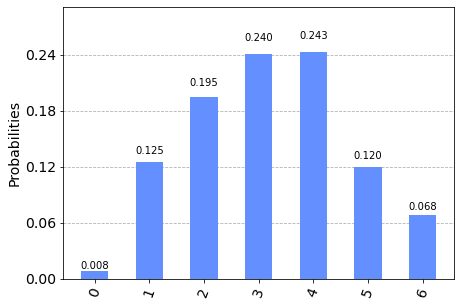

In [65]:
# 1.1 Alice Qubit in state |1>

plot_histogram(exi_counts_1state)

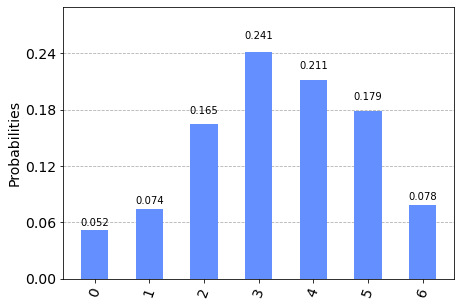

In [66]:
# 1.2 Alice Qubit in state |0>

plot_histogram(exi_counts_0state)